In [8]:
import requests   #对网页进行请求
from bs4 import BeautifulSoup   #网页解析库

In [9]:
# 爬取猫眼电影top100的爬虫
for i in range(0,100,10):  #0到100以10为步长，range总是考虑后面的数减步长
    url = 'http://maoyan.com/board/4?offset={}'.format(i)   #猫眼top100数据所在网页
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36'}   #因为猫眼对爬虫或许有反爬措施，所以这里进行简单的处理，将我们的爬虫伪装成是人访问
    response = requests.get(url,headers = headers)     #对网页进行请求并返回值
    html = response.text      #将网页内容以html返回
    soup = BeautifulSoup(html,'lxml')      #解析网页的一种方法
    name = soup.find_all('p',class_="name")    #对电影名字的定位
    score = soup.find_all('p',class_="score")   #对电影评分的定位
    time = soup.find_all('p',class_="releasetime")  #对电影上映时间的定位
    artist = soup.find_all('p',class_="star")       #对主演的定位
    dic = {}    #创建一个字典，用来储存
    for n in range(len(name)) :         #对于每一部电影进行同样的内容处理
        # print(name[n].text)   #实现提取电影名字
        # print(artist[n].text.strip()[3:])   #获取主演名字
        # print(time[n].text[5:])    #上映时间
        # print(score[n].text)   #评分
        dic['name'] = name[n].text
        dic['star'] = artist[n].text.strip()[3:]
        dic['showtime'] = time[n].text[5:]
        dic['score'] = score[n].text
        print(dic)  #输出字典

In [11]:
# 爬取京东商品信息
url="https://item.jd.com/6946605.html"
try:
    r=requests.get(url)
    r.raise_for_status()
    r.encoding=r.apparent_encoding
    print(r.text[:1000])
except:
    print("爬取失败")

<script>window.location.href='https://passport.jd.com/new/login.aspx?ReturnUrl=http%3A%2F%2Fitem.jd.com%2F6946605.html'</script>


In [13]:
# 爬取亚马逊商品信息
url="https://www.amazon.cn/gp/product/B07D51Y714"
try:
    kv={'user-agent':'Mozailla/5.0'}
    r=requests.get(url,headers=kv)
    r.raise_for_status()
    r.encoding=r.apparent_encoding
    print(r.text[1000:2000])
except:
    print("爬取失败")

  ue_sid = (document.cookie.match(/session-id=([0-9-]+)/) || [])[1],
        ue_sn = "opfcaptcha.amazon.cn",
        ue_id = '2K857V34S3BAFT91K97M';
}
</script>
</head>
<body>

<!--
        To discuss automated access to Amazon data please contact api-services-support@amazon.com.
        For information about migrating to our APIs refer to our Marketplace APIs at https://developer.amazonservices.com.cn/index.html/ref=rm_c_sv, or our Product Advertising API at https://associates.amazon.cn/gp/advertising/api/detail/main.html/ref=rm_c_ac for advertising use cases.
-->

<!--
Correios.DoNotSend
-->

<div class="a-container a-padding-double-large" style="min-width:350px;padding:44px 0 !important">

    <div class="a-row a-spacing-double-large" style="width: 350px; margin: 0 auto">

        <div class="a-row a-spacing-medium a-text-center"><i class="a-icon a-logo"></i></div>

        <div class="a-box a-alert a-alert-info a-spacing-base">
            <div class="a-box-inner">
                

In [15]:
#　爬取单张网络图片
import requests 
import os
url="http://img0.dili360.com/ga/M00/4A/77/wKgBzFsfM-2ADQ9iAC7rBKt1uIE377.tub.jpg"
root="E:/pics//"
path=root +url.split('/')[-1]
try:
    if not os.path.exists(root):
        os.mkdir(root)
    if not os.path.exists(path):
        r=requests.get(url)
        with open(path,'wb') as f:
            f.write(r.content)
            f.close()
            print("文件保存成功")
    else:
        print("文件已存在")
except:
    print("爬取失败")

爬取失败


In [17]:
url="http://www.ip138.com/ips138.asp?ip="
try:
    r=urllib.request.get(url+'202.204.80.112')
    r.raise_for_status()
    r.encoding=r.apparent_encoding
    print(r.text[-500:])
except:
    print("爬取失败")

爬取失败


x is :
 [10 20 30 40 50 60 70 80]
y is :
 [174 236 305 334 349 351 342 323]
f1 is :
 [ 3.68686869e-04 -1.28701299e-01  1.10570707e+01  7.26428571e+01]
p1 is :
            3          2
0.0003687 x - 0.1287 x + 11.06 x + 72.64
yvals is :
 [170.71212121 245.25324675 298.47835498 332.5995671  349.82900433
 352.37878788 342.46103896 322.28787879]


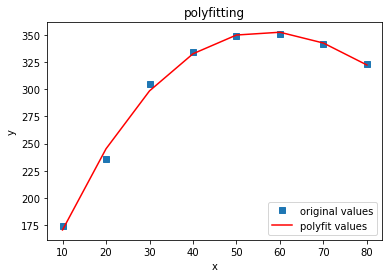

In [21]:
# 多项式拟合
import numpy as np
import matplotlib.pyplot as plt
#定义x、y散点坐标
x = [10,20,30,40,50,60,70,80]
x = np.array(x)
print('x is :\n',x)
num = [174,236,305,334,349,351,342,323]
y = np.array(num)
print('y is :\n',y)
#用3次多项式拟合
f1 = np.polyfit(x, y, 3)
print('f1 is :\n',f1)
 
p1 = np.poly1d(f1)
print('p1 is :\n',p1)
 
#也可使用yvals=np.polyval(f1, x)
yvals = p1(x)  #拟合y值
print('yvals is :\n',yvals)
#绘图
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.show()

In [31]:
#encoding=utf-8  
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
#自定义函数 e指数形式
def func(x, a,u, sig):
    return  a*(np.exp(-(x - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig))*(431+(4750/x))
#定义x、y散点坐标
x = [40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135]
x=np.array(x)
# x = np.array(range(20))
print('x is :\n',x)
num = [536,529,522,516,511,506,502,498,494,490,487,484,481,478,475,472,470,467,465,463]
y = np.array(num)
print('y is :\n',y)
popt, pcov = curve_fit(func, x, y,p0=[3.1,4.2,3.3])
#获取popt里面是拟合系数
a = popt[0]
u = popt[1]
sig = popt[2]
yvals = func(x,a,u,sig) #拟合y值
print(u'系数a:', a)
print(u'系数u:', u)
print(u'系数sig:', sig)
#绘图
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('curve_fit')
plt.show()

x is :
 [ 40  45  50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125
 130 135]
y is :
 [536 529 522 516 511 506 502 498 494 490 487 484 481 478 475 472 470 467
 465 463]


NameError: name 'math' is not defined

In [28]:
str3="sunck is a good man!sunck is a nice man!sunck is a handsome man"
d=re.finditer(r"(sunck)",str3)
while True:
    try:
        i=next(d)
        print(d)
    except StopIteration as e:
        break

NameError: name 're' is not defined

In [33]:
numbers = [12, 37, 5, 42, 8, 3]
even = []
odd = []
while len(numbers) > 0 :
    number = numbers.pop()
    if(number % 2 == 0):
        even.append(number)
    else:
        odd.append(number)
print(even)
print(odd)

[8, 42, 12]
[3, 5, 37]


In [34]:
def area(r):
    PI=3.14
    return PI*r*r
r=float(input("请输入半径r:"))
print("半径为%.2f的圆的面积为%.2f"%(r,area(r)))

请输入半径r:55
半径为55.00的圆的面积为9498.50


In [37]:
x=int(input("请输入x的值:"))
y=int(input("请输入y的值:"))
t=x
x=y
y=t
print("交换后x的值为%d"%x)
print("交换后y的值为%d"%y)

请输入x的值:55
请输入y的值:33
交换后x的值为33
交换后y的值为55


In [40]:
# 线性规划
import numpy as np
from scipy import optimize
c = [-2, -3, 5]
a = [[-2, 5, -1], [1, 3, 1]]
b = [-10, 12]
aeq = [[1, 1, 1]]
beq = [7]
bounds = [[0, None], [0, None], [0, None]]	# (0, None) means non-negative, this is a default value
result = optimize.linprog(c, a, b, aeq, beq, bounds)
print(result)

     con: array([1.80711801e-09])
     fun: -14.571428565645089
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-2.24563479e-10,  3.85714286e+00])
  status: 0
 success: True
       x: array([6.42857143e+00, 5.71428571e-01, 2.35900788e-10])


In [44]:
# 整数规划
import random
x = [random.random() * 12 for i in range(0, 10000000)]
y = [random.random() * 9 for i in range(0, 10000000)]
p = 0
for i in range(0, 10000000):
    if x[i] <= 3 and y[i] < x[i] ** 2:
            p += 1
    elif x[i] > 3 and y[i] < 12 - x[i]:
            p += 1
area_appr = 12 * 9 * p / 10 ** 7
print(area_appr)

49.4909028


In [45]:
import time
import random
# 目标函数
def f(x: list) -> int:
    return x[0] ** 2 + x[1] ** 2 + 3 * x[2] ** 2 + 4 * x[3] ** 2 + 2 * x[4] ** 2 - 8 * x[0] - 2 * x[1] - 3 * x[2] - x[3] -2 * x[4]
# 约束向量函数
def g(x: list) -> list:
    res = []
    res.append(sum(x) - 400)
    res.append(x[0] + 2 * x[1] + 2 * x[2] + x[3] + 6 * x[4] - 800)
    res.append(2 * x[0] + x[1] + 6 * x[2] - 200)
    res.append(x[2] + x[3] + 5 * x[4] - 200)
    return res
random.seed(time.time)
pb = 0
xb = []
for i in range(10 ** 6):
    x = [random.randint(0, 99) for i in range(5)]		# 产生一行五列的区间[0, 99] 上的随机整数
    rf = f(x)
    rg = g(x)
    if all((a < 0 for a in rg)):		# 若 rg 中所有元素都小于 0
        if pb < rf:
            xb = x
            pb = rf           
print(xb, pb)

[28, 99, 1, 99, 14] 49632


In [46]:
# 非线性规划
import numpy as np
from scipy import optimize
f = lambda x: x[0] ** 2 + x[1] **2 + x[2] ** 2 + 8
# Notice：eq ==; ineq >=
cons = ({'type': 'ineq', 'fun': lambda x: x[0]**2 - x[1] + x[2]**2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - x[1] - x[2]**3 + 20},
        {'type': 'eq', 'fun': lambda x: -x[0] - x[1]**2 + 2},
        {'type': 'eq', 'fun': lambda x: x[1] + 2 * x[2]**2 - 3})

res = optimize.minimize(f, (0, 0, 0), constraints=cons)
print(res)

     fun: 10.651091840572583
     jac: array([1.10433471, 2.40651834, 1.89564812])
 message: 'Optimization terminated successfully'
    nfev: 71
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.55216734, 1.20325918, 0.94782404])


In [47]:
import sympy
f, x, y = sympy.symbols("f x y")
f = x**3 - y**3 + 3 * x**2 + 3 * y**2 - 9 * x
funs = sympy.Matrix([f])
args = sympy.Matrix([x, y])
df = funs.jacobian(args)        # 一阶偏导
d2f = df.jacobian(args)         # Hessian 矩阵
stationaryPoints = sympy.solve(df)      # 驻点
for i in stationaryPoints:
    a = d2f.subs(x, i[x]).subs(y, i[y])	# 驻点处的Hessian
    b = a.eigenvals(multiple=True)      # 求Hessian矩阵的特征值
    fv = f.subs(x, i[x]).subs(y, i[y])	# 驻点处的函数值
    
    if all((j > 0 for j in b)):
        print('点({x}, {y})是极小值点，对应的极小值为: f({x}, {y}) = {f}'.format(x=i[x], y=i[y], f=fv))
    elif all((j < 0 for j in b)):
        print('点({x}, {y})是极大值点，对应的极大值为: f({x}, {y}) = {f}'.format(x=i[x], y=i[y], f=fv))
    elif any((j < 0 for j in b)) and any((j > 0 for j in b)):
        print('点({x}, {y})不是极值点'.format(x=i[x], y=i[y]))
    else:
        print('无法判断点({x}, {y})是否为极值点'.format(x=i[x], y=i[y]))

点(-3, 0)不是极值点
点(-3, 2)是极大值点，对应的极大值为: f(-3, 2) = 31
点(1, 0)是极小值点，对应的极小值为: f(1, 0) = -5
点(1, 2)不是极值点


In [49]:
# 数值解
import numpy as np
from scipy import optimize
f = lambda x: x[0]**3 - x[1]**3 + 3 * x[0]**2 + 3 * x[1]**2 - 9 * x[0]
resMin = optimize.minimize(f, (0, 0))		# 求最小值
resMax = optimize.minimize(lambda x: -f(x), (0, 0))		# 求最大值
print("最小值：\n")
print(resMin)
print("最大值：\n")
print(resMax)

最小值：

      fun: -5.0
 hess_inv: array([[8.34028325e-02, 3.27721596e-09],
       [3.27721596e-09, 1.00000000e+00]])
      jac: array([1.1920929e-07, 0.0000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 1.00000000e+00, -5.40966234e-09])
最大值：

      fun: -30.999999999999915
 hess_inv: array([[0.0839028 , 0.00023508],
       [0.00023508, 0.16671226]])
      jac: array([-1.43051147e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 132
      nit: 13
     njev: 44
   status: 0
  success: True
        x: array([-3.00000012,  1.99999999])


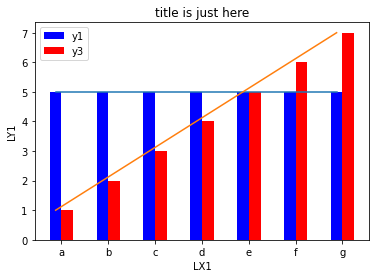

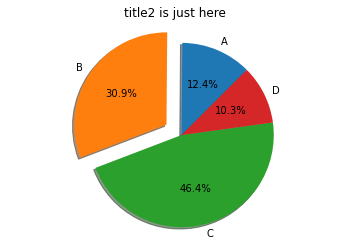

In [51]:
# python数学建模---绘制图表
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(7) #x产生7组
#y1,y2 = np.random.randint(1,49,size=(2,7)) #y1,y2随机产生,7*7=49
y1=[5,5,5,5,5,5,5]
y2=[1,2,3,4,5,6,7]
width = 0.25 #代表柱状图的宽度 
ax = plt.subplot(1,1,1)
ax.bar(x,y1,width,color='blue',label='y1')   #bar 是绘制柱状图
ax.bar(x+width,y2,width,color='red',label='y3') #设置x轴，y轴，宽度，颜色
ax.set_xticks(x+.5*width) #一半的柱宽正好可以让字母处于中间
ax.set_xticklabels(['a','b','c','d','e','f','g']) #自定义x的刻度标签的内容
plt.plot(x,y1) #这两行又在原有基础上连了一个折线图
plt.plot(x,y2)
plt.legend(loc=0)
plt.ylabel('LY1')
plt.xlabel('LX1')
plt.title('title is just here')
#以下为饼图
label=['A','B','C','D']
size=[12,30,45,10] #数字为饼的分块占比
fig,ax=plt.subplots()  #面向对象画图
explode=(0,0.2,0,0)    #第二块扇形移出，数值越大，移除的距离越远
plt.title('title2 is just here')
ax.pie(size,labels=label,autopct='%1.1f%%',shadow=True,startangle=45,explode=explode) #autopct自动显示百分比  shadow=90显示出阴影    startangle=90饼图倾斜与正
ax.axis('equal')   #将椭圆变为圆
plt.show()

In [53]:
# 矩阵运算
import numpy as np
from numpy.linalg import *
nptest=np.array([[-4,3,0],[3,0,-1],[1,2,-2]])
print("矩阵:")
print(nptest)
print("逆矩阵:")
print(inv(nptest))
nptest=np.array([[-4,3,0],[3,0,-1],[1,2,-2]])
print("转置:")
print(nptest.transpose())
nptest=np.array([[-4,3,0],[3,0,-1],[1,2,-2]])
print("行列式:")
print(det(nptest))

矩阵:
[[-4  3  0]
 [ 3  0 -1]
 [ 1  2 -2]]
逆矩阵:
[[ 0.28571429  0.85714286 -0.42857143]
 [ 0.71428571  1.14285714 -0.57142857]
 [ 0.85714286  1.57142857 -1.28571429]]
转置:
[[-4  3  1]
 [ 3  0  2]
 [ 0 -1 -2]]
行列式:
7.000000000000001


In [54]:
#循环输出第n个斐波那契数列的python3程序
def Fibonacci_series (n_th):
     if n_th==1:
        return (1)
     elif n_th==2:
        return(1)
     elif n_th>2:
        return Fibonacci_series(n_th-1)+Fibonacci_series(n_th-2)
z=0
n_th=1
while n_th>=1:
    print("Input n:")
    n_th=input()
    n_th=int(n_th)
    if n_th==0:
        print("Fibonacci series calculation has been stopped")
    if n_th>=1:
       print("The n_th number of Fibonacci series:")
       print(Fibonacci_series(n_th))

Input n:



ValueError: invalid literal for int() with base 10: ''

In [58]:
w = int(input("输入一个数字还你一个斐波那契数列："))
list_res = []
def list_n(n):
    if n>=3:
        res=list_n(n-1)+list_n(n-2)
    else:
        res=1
    return res

print("开始")

for i in range(0,w):
    list_res.append(list_n(i+1))
print(list_res)

输入一个数字还你一个斐波那契数列：5
开始
[1, 1, 2, 3, 5]
